Laboratorio de Métodos cuantitativos para la Gestión


---

Clase de Integración 1.2



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

❤ ⚛ ⛵

#Repaso integrales
Determine el excedente del consumidor y del productor para las funciones de demanda y oferta que se dan a continuación.

$D:
p = 120 − x^2$

$O: p = 32 + 3x $

In [ ]:
x = sp.symbols('x')

In [ ]:
P_d = (120 - x**2)

In [ ]:
P_s = 32+3*x

Busquemos el punto de equilibrio

In [ ]:
x_opt = sp.solve(sp.Eq(P_d, P_s), x)
x_opt #vamos a tomar la cantidad positiva

[-11, 8]

In [ ]:
x_opt = sp.solve(sp.Eq(P_d, P_s), x)[1]

In [ ]:
p_opt = P_s.subs(x, x_opt)
p_opt

56

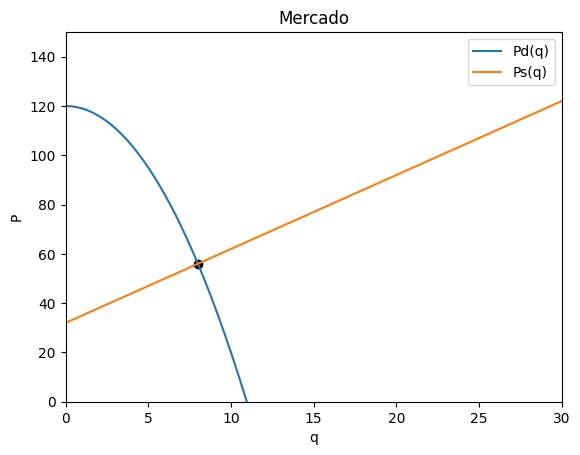

In [ ]:
# @title

x_grid = np.linspace(0, 50, 500)
Pd_num = sp.lambdify(x, P_d)(x_grid)
Ps_num = sp.lambdify(x, P_s)(x_grid)
plt.figure()
plt.plot(x_grid, Pd_num, label='Pd(q)')
plt.plot(x_grid, Ps_num, label='Ps(q)')
plt.scatter([x_opt], [p_opt], c="black")
plt.title('Mercado')
plt.ylim(0, 150)
plt.xlim(0,30)
plt.xlabel('q')
plt.ylabel('P')
plt.legend()
plt.show()

Nuestra fórmula para el EC será: $$ EC = \int\limits_{0}^{q^*} [P_d(q) - P_d(q^*)] dq $$

Computémoslo.

In [ ]:
EC=sp.integrate(P_d-p_opt, (x, 0, x_opt))

Nuestra fórmula para el EP será: $$ EP = \int\limits_{0}^{q^*} [P_s(q^*) - P_s(q)] dq $$

Computémoslo.

In [ ]:
EP=sp.integrate(p_opt-P_s, (x, x_opt, 0))

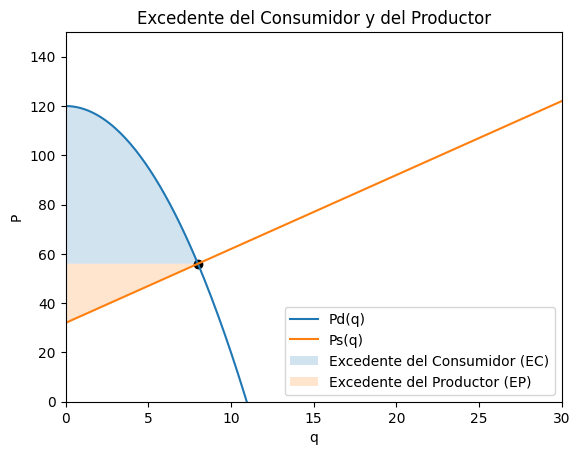

In [ ]:
plt.figure()
plt.plot(x_grid, Pd_num, label='Pd(q)')
plt.plot(x_grid, Ps_num, label='Ps(q)')
plt.scatter([x_opt], [p_opt], c="black")

plt.fill_between(
    x_grid,
    Pd_num,
    float(p_opt),
    where=(x_grid <= float(x_opt)),
    alpha=0.2,
    label='Excedente del Consumidor (EC)'
)

plt.fill_between(
   x_grid,
    float(p_opt),
    Ps_num,
    where=(x_grid <= float(x_opt)),
    alpha=0.2,
    label='Excedente del Productor (EP)'
)

plt.title('Excedente del Consumidor y del Productor')
plt.xlabel('q')
plt.ylabel('P')
plt.xlim(0,30)
plt.ylim(0,150)
plt.legend()
plt.show()

Calcular el Deadweight Loss si se aplica un impuesto de suma fija t=7 a los productores

$O:(p-32)/3=x$ ➡ $(p-t-32)/3=x$ ➡ $p=3x+t+32$

In [ ]:
t=sp.symbols('t')
P_s_t=3*x+t+32

In [ ]:
P_s_t=P_s_t.subs(t,10)

In [ ]:
x_opt_t = sp.solve(sp.Eq(P_d, P_s_t), x)
x_opt_t = [sol for sol in x_opt_t if sol > 0][0]
x_opt_t

-3/2 + sqrt(321)/2

In [ ]:
p_opt_t = P_s_t.subs(x, x_opt_t)
p_opt_t

3*sqrt(321)/2 + 75/2

In [ ]:
EC_t = sp.integrate(P_d - p_opt_t, (x, 0, x_opt_t))
EP_t = sp.integrate(p_opt_t - P_s_t, (x, 0, x_opt_t))
EC_t.evalf(), EP_t.evalf()

(276.577713147899, 83.4379360488699)

$$ DWL = \int\limits_{Q_{s}^{t}(p_{opt})}^{q_opt^{t}} [P_{s}^{t} (q) - P^{*}] \ dq + \int\limits_{q_opt^{t}}^{q_opt} [P_{d} (q) - P^{*}] \ dq $$

In [ ]:
q_t_pviejo = sp.solve(sp.Eq(P_s_t, p_opt), x)[0]


DWL_int_1 = sp.integrate(
    P_s_t - p_opt,
    (x, q_t_pviejo, x_opt_t)
)
DWL_int_1.evalf()

11.6892926453542

In [ ]:
DWL_int_2 = sp.integrate(
    P_d - p_opt,
    (x, x_opt_t, x_opt)
)
DWL_int_2.evalf()

2.29505815787728

In [ ]:
DWL= DWL_int_1 + DWL_int_2
DWL.evalf()

13.9843508032315

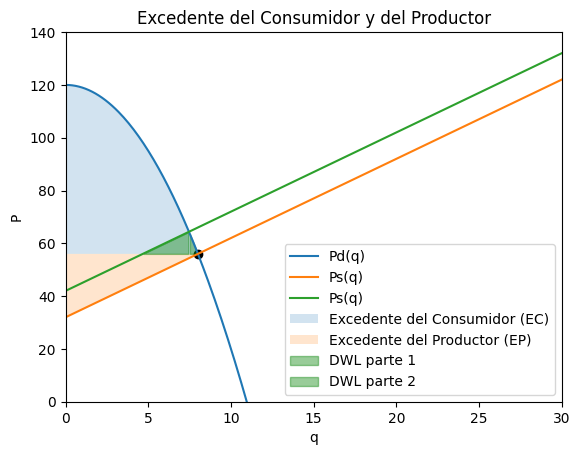

In [ ]:
P_s_t_num = sp.lambdify(x, P_s_t)(x_grid)
plt.figure()
plt.plot(x_grid, Pd_num, label='Pd(q)')
plt.plot(x_grid, Ps_num, label='Ps(q)')
plt.plot(x_grid, sp.lambdify(x, P_s_t)(x_grid), label='Ps(q)')
plt.scatter([x_opt], [p_opt], c="black")

plt.fill_between(
    x_grid,
    Pd_num,
    float(p_opt),
    where=(x_grid <= float(x_opt)),
    alpha=0.2,
    label='Excedente del Consumidor (EC)'
)

plt.fill_between(
   x_grid,
    float(p_opt),
    Ps_num,
    where=(x_grid <= float(x_opt)),
    alpha=0.2,
    label='Excedente del Productor (EP)'
)


mask_dwl_1 = (x_grid >= float(q_t_pviejo)) & (x_grid <= x_opt_t)
plt.fill_between(x_grid, P_s_t_num, float(p_opt),
                 where=mask_dwl_1,
                 color='green', alpha=0.4,
                 label='DWL parte 1 ')



mask_dwl_2 = (x_grid >= x_opt_t) & (x_grid <= x_opt)
plt.fill_between(x_grid, float(p_opt), Pd_num,
                 where=mask_dwl_2,
                 color='green', alpha=0.4,
                 label='DWL parte 2')


plt.title('Excedente del Consumidor y del Productor')
plt.xlabel('q')
plt.ylabel('P')
plt.xlim(0,30)
plt.ylim(0,140)
plt.legend()
plt.show()

#Ejercicio 1
Disponemos de una base de datos con métricas de Bonos Hard Dollar; vamos a trabajar un poco con ella y hacer algunos gráficos para terminar de consolidar. No nos vamos a enfocar en el contenido del dataset sino en que sepan manejar la base. Es un poco más linda que la anterior.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
hd=pd.read_csv('/content/2025-11-03T15-31_export.csv')
hd.head()

Vamos a armar carteras de 6 activos al azar (condición: cada activo debe ser de un emisor distinto) y evaluar su rendimiento. Para eso, primero vamos a descartar las filas que tengan valores nulos NaN, porque sin saber datos como la TIR se dificulta evaluar el rendimiento de la cartera.

In [ ]:
random_assets = hd.sample(n=6)
print(random_assets)

In [ ]:
carteras = []


hd_limpio = hd.dropna()  # Esto elimina cualquier fila con valores NaN en cualquier columna.

for i in range(6):
    cartera = hd_limpio.sample(n=10)
    cartera = cartera.drop_duplicates(subset=['Emisor']).head(6)


    if len(cartera) < 6:
        unique_assets = hd_limpio.drop_duplicates(subset=['Emisor']).sample(n=6, replace=False)
        cartera = unique_assets
    else:
        cartera = cartera.head(6)

    carteras.append(cartera)
    print(f"Cartera {i+1}:")
    print(cartera)
    print("-" * 40)

Evaluemos las carteras utilizando como medida de volatilidad el promedio ponderado de la Modified Duration; el rendimiento esperado se calculará como el promedio ponderado de la TIR.

In [ ]:
portfolio_metricas = [] #vamos a almacenar las métricas de cada cartera en una lista porque después cuando queramos graficar va a ser útil
cartera_1 = carteras[0].copy()
cartera_1['peso'] = [0.20,0.2,0.1,0.1,0.3,0.1] #acá estoy diciendo cuanto pondera cada activo. l´´ogicamente debe sumar 100

volatilidad_cartera_1 = np.average(cartera_1['Modified Duration'], weights=cartera_1['peso'])
print('---'*40)
print(f"Volatilidad Cartera 1:", volatilidad_cartera_1)
rendimiento_esperado_cartera_1 = np.average(cartera_1['TIR'], weights=cartera_1['peso'])
print('---'*40)
print(f"Rendimiento esperado Cartera 1:", rendimiento_esperado_cartera_1)
portfolio_metricas.append({
    'portfolio_id': 1,
    'volatilidad': volatilidad_cartera_1,
    'rendimiento': rendimiento_esperado_cartera_1,
    })


In [ ]:
cartera_2=carteras[1].copy()
cartera_2['peso'] = [0.30,0.1,0.1,0.1,0.3,0.1]
volatilidad_cartera_2 = np.average(cartera_2['Modified Duration'], weights=cartera_2['peso'])
print('---'*40)
print(f"Volatilidad Cartera 2:", volatilidad_cartera_2)
rendimiento_esperado_cartera_2 = np.average(cartera_2['TIR'], weights=cartera_2['peso'])
print('---'*40)
print(f"Rendimiento esperado Cartera 2:", rendimiento_esperado_cartera_2)
portfolio_metricas.append({
    'portfolio_id': 2,
    'volatilidad': volatilidad_cartera_2,
    'rendimiento': rendimiento_esperado_cartera_2,
    })

In [ ]:
cartera_3=carteras[2].copy()
cartera_3['peso'] = [0.30,0.1,0.1,0.1,0.2,0.2]
volatilidad_cartera_3 = np.average(cartera_3['Modified Duration'], weights=cartera_3['peso'])
print('---'*40)
print(f"Volatilidad Cartera 3:", volatilidad_cartera_3)
rendimiento_esperado_cartera_3 = np.average(cartera_3['TIR'], weights=cartera_3['peso'])
print('---'*40)
print(f"Rendimiento esperado Cartera 3:", rendimiento_esperado_cartera_3)
portfolio_metricas.append({
    'portfolio_id': 3,
    'volatilidad': volatilidad_cartera_3,
    'rendimiento': rendimiento_esperado_cartera_3,
    })


Bueno acá habría que repetir esto hasta la sexta cartera... ¿Se les ocurre alguna forma que nos evite escribir seis veces lo mismo? Quizás algun ciclo que contenga lo que estamos programando recursivamente...

Vamos a generar un excel con las carteras que armamos

In [ ]:
with pd.ExcelWriter('carteras.xlsx') as writer:
            for i, cartera in enumerate(carteras):
             cartera.to_excel(writer, sheet_name=f'Cartera_{i+1}', index=False)

            excel_de_carteras = pd.concat(carteras, keys=[f'Cartera_{i+1}' for i in range(len(carteras))])
            excel_de_carteras.to_excel(writer, sheet_name='Carteras')

##Grafiquemos
- Crear un scatter plot que muestre la relación volatilidad - rendimiento de las carteras generadas
- Crear un gráfico de barras que muestre cuántos de los bonos que observamos se rigen por la ley argentina
- Crear un gráfico de barras por emisor

In [ ]:
# Convert the list of dictionaries to a pandas DataFrame for easier plotting
portfolio_df = pd.DataFrame(portfolio_metricas)

plt.figure(figsize=(10, 6))
plt.scatter(portfolio_df['volatilidad'], portfolio_df['rendimiento'])
plt.xlabel('Volatilidad ')
plt.ylabel('Rendimiento esperado (%)')
plt.title('Volatilidad vs. Rendimiento')
plt.grid(True)

for i, row in portfolio_df.iterrows():
    plt.annotate(f"Cartera {int(row['portfolio_id'])}", (row['volatilidad'], row['rendimiento']), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()

In [ ]:
ley_counts = hd['Ley'].value_counts()

plt.figure(figsize=(8, 5))
ley_counts.plot(kind='bar')
plt.xlabel('Ley')
plt.ylabel('Cantidad de Bonos')
plt.title('Cantidad de Bonos por Ley')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [ ]:
emisor_counts = hd['Emisor'].value_counts()

plt.figure(figsize=(10, 6))
emisor_counts.plot(kind='bar',color='green')
plt.xlabel('Emisor')
plt.ylabel('Cantidad de Bonos')
plt.title('Cantidad de Bonos por Emisor')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

#Ejercicio 2

Este conjunto de datos representa las respuestas de 9 proveedores diferentes a una solicitud de cotización para un proyecto de construcción. La estructura es un formato matricial clásico, común en las adquisiciones. **Se sugiere observar primero la planilla en excel.**

In [ ]:
df=pd.read_excel('/content/12 - Informe de recomendación  - Hoja 1 (1).xlsx')

In [ ]:
df.head() #vean lo poco atractivo que es esto!

In [ ]:
#valores nulos
valores_faltantes=df.isna().sum().sum()
valores_faltantes_porcolumna= df.isna().sum()
valores_faltantes_porcolumna

Vean que hay muchas celdas con la leyenda 'No Cotiza' ... ¿qué hacemos con esto?

In [ ]:
for col in df.columns:
        for idx in df.index: #estamos anidando dos for para que python mire CELDA A CELDA
            celda = df.at[idx, col]
            if celda == 'No cotiza':
                df.at[idx, col] = np.nan
df.head()

Repetimos la búsqueda de nulos

In [ ]:
#valores nulos
valores_faltantes=df.isna().sum().sum()
valores_faltantes_porcolumna= df.isna().sum()
valores_faltantes_porcolumna

Crear una columna que muestre el menor valor para cada producto

In [ ]:
#examinemos un poco más la base
df

In [ ]:
#hasta la fila 35 tenemos productos, y el primer producto aparece en la fila 3, que python indexa como 2 porque empieza a contar
#desde 0

In [ ]:
#a pesar de haber cambiado los 'No cotiza' hay otros strings...
for col in df.columns[6:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')
# seleccionar desde la columna 5 hasta el final
df['Menor Valor'] = df.iloc[1:36, 6:].min(axis=1)
df.head()

Elaborar un data frame que tenga la lista de productos con el menor valor (precio unitario) para determinar el menor costo a incurrir en materiales de construcción

In [ ]:
df_menor_valor = df[['Descripcion', 'Menor Valor']].dropna(subset=['Menor Valor'])
df_menor_valor

Elaborar otro Data Frame que muestre los productos para la obra que quedaron sin cotizar. Esto es fundamental porque va a haber que pedir presupuesto a otros corralones de materiales o elaborar un plan de acción para no tener faltantes a la hora de empezar a construir.

In [ ]:
df_sin_cotizar = df.iloc[:36][df.iloc[:36]['Menor Valor'].isna()][['Item', 'Descripcion']]
df_sin_cotizar

Suponga que se ordenó priorizar la calidad del producto 'Cemento Portland Normal. Bolsa 50 kg', por lo que en vez de elegir la menor cotización se utilizará el que vende 'CURA CALQUIN S.R.L.'. Modifique la tabla de precios df_menor_valor

In [ ]:
#busquemos el precio puntual que se necesita
cemento_precio_cura = df.loc[df['Descripcion'] == 'Cemento Portland Normal. Bolsa 50 kg', 'CURA CALQUIN S.R.L.\nC.U.I.T. Nº 30-64116857-9'].iloc[0]

#ahora lo cambiamos en nuestra tablita nueva
df_menor_valor.loc[df_menor_valor['Descripcion'] == 'Cemento Portland Normal. Bolsa 50 kg', 'Menor Valor'] = cemento_precio_cura

df_menor_valor

In [ ]:
#creamos una fila de totales para ver cuanto vamos a gastar
df_menor_valor.loc()['TOTAL']=df_menor_valor['Menor Valor'].sum()
df_menor_valor

Fuentes:

[Bondapp](https://porabajo.streamlit.app/)

"Notas de Análisis Matemático I Teórico Prácticas." María José Bianco, Andrea Gache, Roberto A. García, Gustavo Zorzoli.	2022. Primera edición. Editorial	Facutad de Ciencias Económicas, Universidad de Buenos Aires

Hilpisch, Y. (2018). Python for Finance: Mastering Data-Driven Finance (2nd ed.). O’Reilly Media.